In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df=pd.read_csv("delivery_time.csv")

In [6]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ac6e4d84df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac6e4d85330>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac6e4d3b970>,
 'medians': [<matplotlib.lines.Line2D at 0x7ac6e4d85870>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ac6e4d85b10>,
 'means': []}

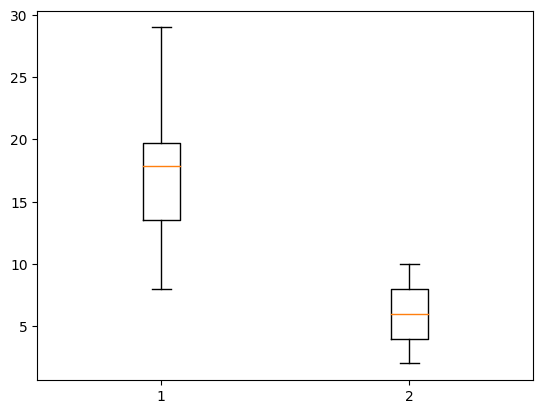

In [10]:
plt.boxplot(df)

<Axes: ylabel='Count'>

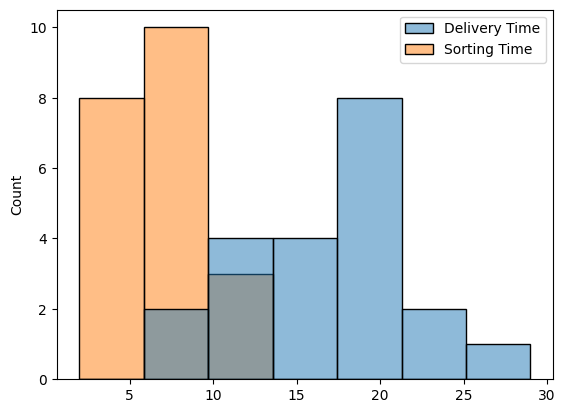

In [11]:
sns.histplot(df)

In [12]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

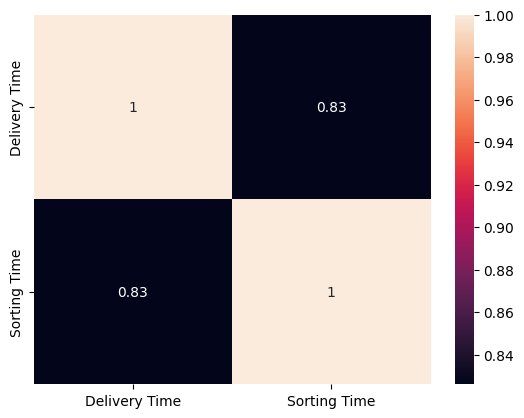

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1=scaler.fit_transform(df)
scaled_df=pd.DataFrame(df1,columns=df.columns)
scaled_df.head()


,Delivery Time,Sorting Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(df)
scaled_df = pd.DataFrame(df2, columns = df.columns)
scaled_df.head()






,Delivery Time,Sorting Time
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625


In [16]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [19]:
import statsmodels.formula.api as smf
model = smf.ols(formula ='delivery_time~sorting_time', data = df).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           3.98e-06
Time:                        08:05:06   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# cube root transformation on *data*





In [21]:
square_root_model = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = df).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Sat, 13 Apr 2024   Prob (F-statistic):           8.48e-07
Time:                            08:08:02   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# log  transformation on data

In [22]:
log_model = smf.ols('np.log(delivery_time)~np.log(sorting_time)', data = df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sat, 13 Apr 2024   Prob (F-statistic):           1.60e-07
Time:                           08:11:27   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

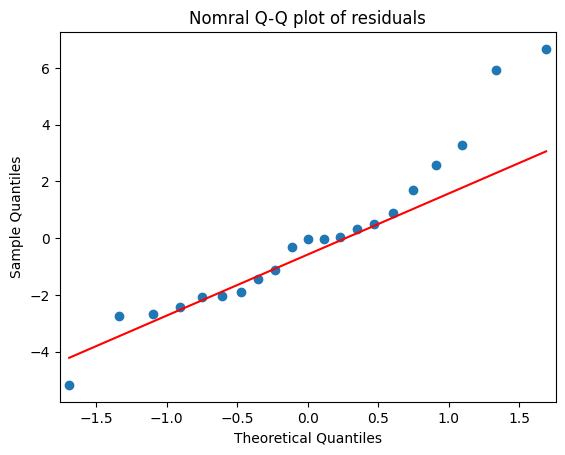

In [23]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Nomral Q-Q plot of residuals")
plt.show()

In [24]:
np.where(model.resid>10)

(array([], dtype=int64),)

In [26]:
def get_standardize_values( vals):
  return (vals - vals.mean())/vals.std()

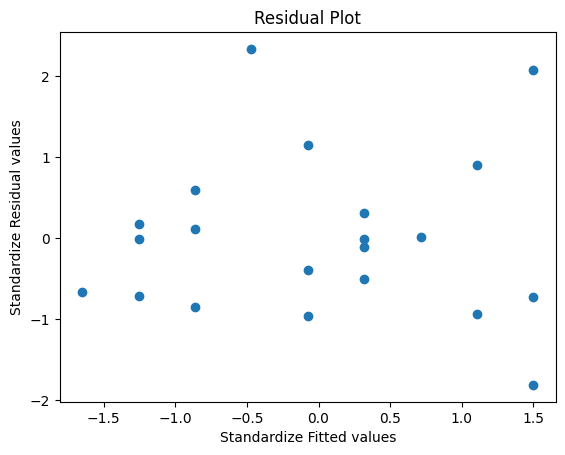

In [27]:
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residual Plot')
plt.show()

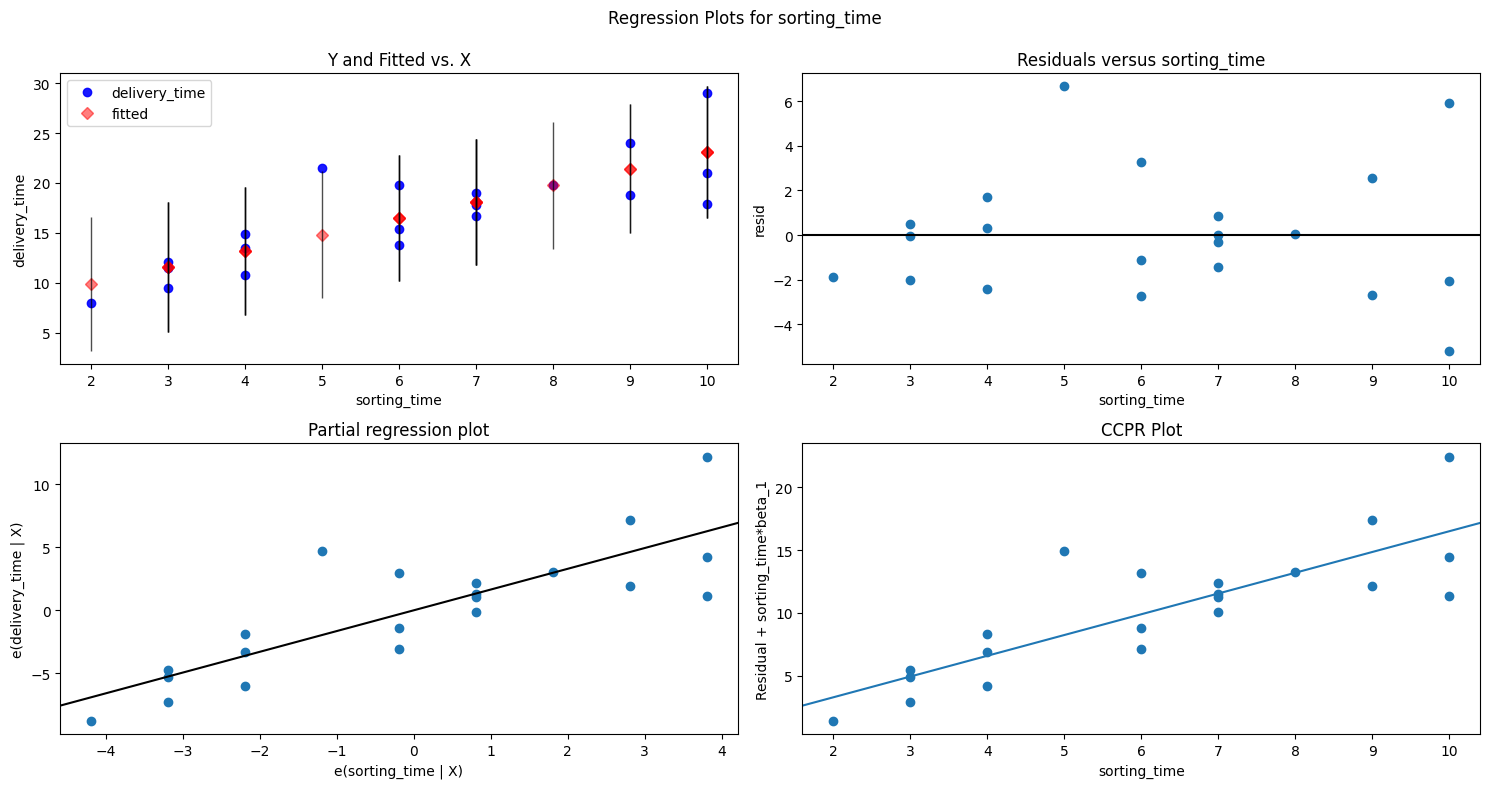

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"sorting_time",fig=fig)
plt.show()

In [29]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

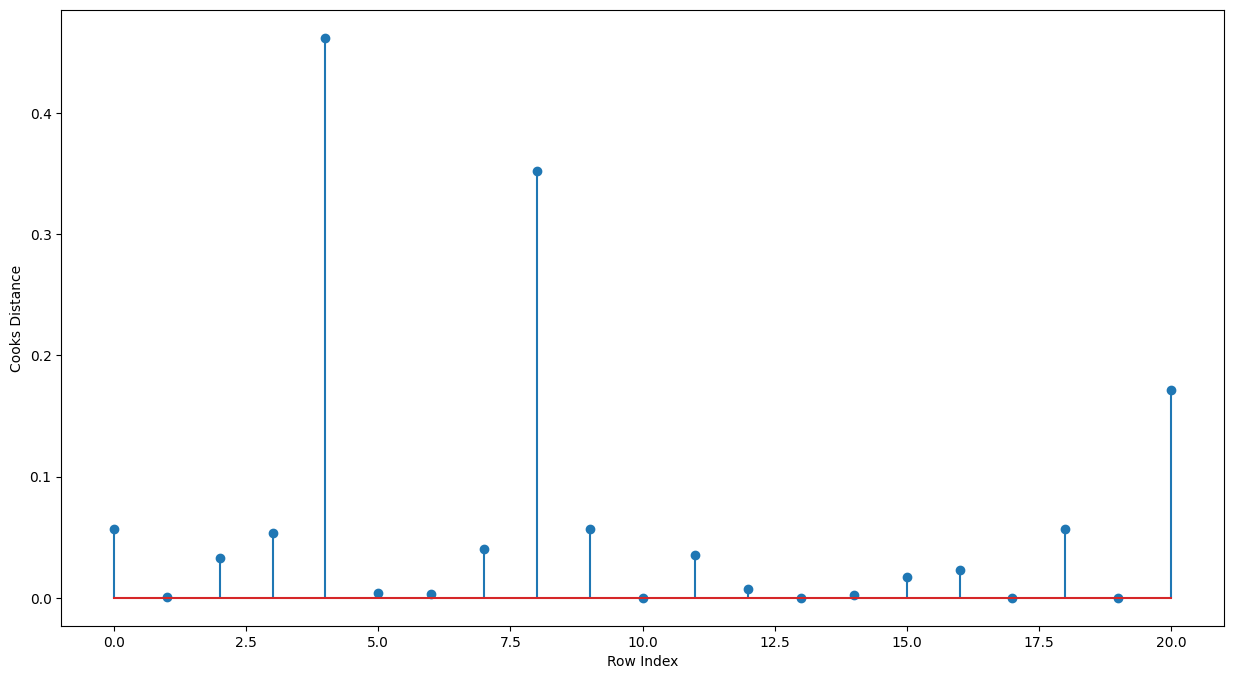

In [31]:
fig = plt.subplots(figsize=(15,8))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
(np.argmax(c),np.max(c))

(4, 0.462053041265031)

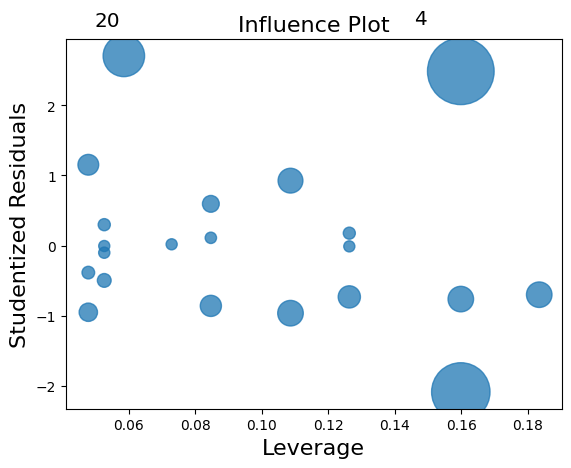

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [35]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.42857142857142855

In [37]:
final_ml_v=smf.ols(formula ='delivery_time~sorting_time', data = df).fit()

In [38]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.6822714748417231, 106.71400170798609)

In [39]:
newdata = pd.Series([5,10])

In [41]:
data_pred = pd.DataFrame(newdata, columns = ['sorting_time'])


In [42]:
data_pred

,sorting_time
0,5
1,10


In [43]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64